In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
import scipy.optimize as opt
import pandas as pd

## Question - 1

In [3]:
df = pd.read_csv('table1.csv')
x_in,y_in,sigmaY_in,sigmaX_in,rhoXY_in = df['X'],df['Y'],df['sigmaY'],df['sigmaX'],df['rhoXY']
X,Y,sigma_X,sigma_Y,rho_XY = np.array(x_in),np.array(y_in),np.array(sigmaX_in),np.array(sigmaY_in),np.array(rhoXY_in)


In [4]:
df

,X,Y,sigmaY,sigmaX,rhoXY
0,201,592,61,9,-0.84
1,244,401,25,4,0.31
2,47,583,38,11,0.64
3,287,402,15,7,-0.27
4,203,495,21,5,-0.33
5,58,173,15,9,0.67
6,210,479,27,4,-0.02
7,202,504,14,4,-0.05
8,198,510,30,11,-0.84
9,158,416,16,7,-0.69


In [5]:
def involved_matrices(x_vec,y_vec,sigmaY_vec,n=1):
    Y = y_vec[:,:]
    A = np.hstack((np.ones((len(x_vec),1))))
    for i in range(1,n+1):
        A = np.hstack((A,np.power(x_vec,i)))
    C = np.diag(sigmaY_vec**2)
    return Y,A,C

In [6]:
def best_fit(Y,A,C):
    l_mat = inv(np.transpose(A)*inv(C)*A)
    r_mat = np.transpose(A)*inv(C)*Y

    return np.round(np.sqrt(np.diag(l_mat)), decimals=3), np.round(l_mat*r_mat,decimals=3)

b + m x = (34.047728 +/- 18.246167) + (2.239921 +/- 0.107780) x


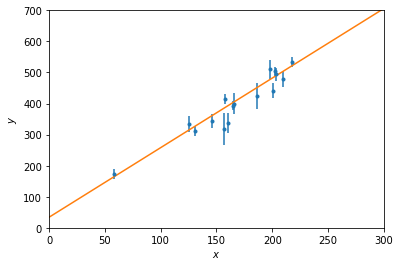

In [7]:
Y1 = Y[4:]
A1 = np.column_stack([np.ones_like(X[4:]), X[4:]])
C1 = np.diag(sigma_Y[4:]**2)

X1 = inv(A1.T @ inv(C1) @ A1) @ (A1.T @ inv(C1) @ Y1)
S1 = inv(A1.T @ inv(C1) @ A1)
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (X1[0], np.sqrt(S1[0][0]), 
                                                 X1[1], np.sqrt(S1[1][1])))

plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X1
plt.plot(x, y);                                                                


## Question - 2 

b + m x = (213.273492 +/- 14.394033) + (1.076748 +/- 0.077407) x


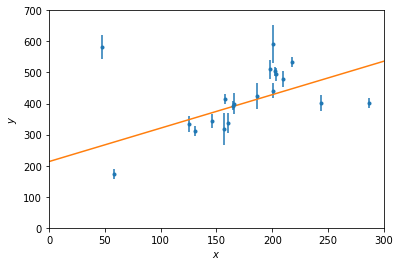

In [8]:
Y2 = Y
A2 = np.column_stack([np.ones_like(X), X])
C2 = np.diag(sigma_Y**2)

X2 = inv(A2.T @ inv(C2) @ A2) @ (A2.T @ inv(C2) @ Y2)
S2 = inv(A2.T @ inv(C2) @ A2)
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (X2[0], np.sqrt(S2[0][0]),
                                                 X2[1], np.sqrt(S2[1][1])))

plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X2
plt.plot(x, y);                                                

## Question - 3

b + m x + q x**2 = (72.894626 +/- 38.911555) + (1.596050 +/- 0.579748) x + (0.002299 +/- 0.002034) x**2


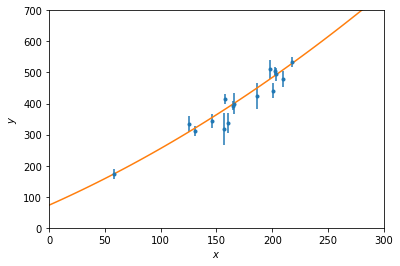

In [9]:
Y3 = Y[4:]
A3 = np.column_stack([np.ones_like(X[4:]), X[4:], X[4:]**2])
C3 = np.diag(sigma_Y[4:]**2)

X3 = inv(A3.T @ inv(C3) @ A3) @ (A3.T @ inv(C3) @ Y3)
S3 = inv(A3.T @ inv(C3) @ A3)
print("b + m x + q x**2 = (%f +/- %f) + (%f +/- %f) x + (%f +/- %f) x**2" % (X3[0], np.sqrt(S3[0][0]),
                                                                             X3[1], np.sqrt(S3[1][1]),
                                                                             X3[2], np.sqrt(S3[2][2])))

plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x, x**2])
y = A @ X3
plt.plot(x, y);

## Question - 4
The frequency distribution for $t_i$ is:
$$ p(t_i | \sigma_{ti}, T) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\left( -\frac{[t_i - T]^2}{2\sigma_{ti}^2} \right). $$
We can use this to calculate the likelihood
$$ \mathcal{L} = \prod_{i=1}^N p(t_i | \sigma_{ti}, T), $$
and log likelihood 
$$ \ln \mathcal{L} = K - \sum_{i=1}^N \frac{[t_i - T]^2}{2\sigma_{ti}^2}. $$
The maximum log likelihood is obtained when the derivative to $T$ is zero:
$$ 0 = \frac{d}{dT} \ln \mathcal{L} = \sum_{i=1}^N \frac{[t_i - T]}{\sigma_{ti}^2}. $$
Indeed this is a maximum:
$$ \frac{d}{dT} \ln \mathcal{L} = - \sum_{i=1}^N \frac{1}{\sigma_{ti}^2} < 0. $$
The maximum log likelihood is obtained when:
$$ T = \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{ti}^2}}, $$
or an expression given by the weighted mean.

## Question - 5 
Starting from the definition of $\chi^2$ as
$$ \chi^2 = [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] $$
we can take a derivative with respect to $\mathbf{X}$ as
$$ 0 = \frac{d}{d\mathbf{X}} \chi^2 = -\mathbf{A}^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] -  [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} \mathbf{A} $$
or
$$ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{A} \mathbf{X} = \mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y} $$
which is satisfied for
$$ \mathbf{X} = [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y}] $$

## Question 6

### Mixed Likelihood function

\begin{equation}
\mathcal{L} = \prod_{i=1}^{N} \left[ (1-P_b) \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i-mx_i-b)^2}{2\sigma^2}\right) + P_b \frac{1}{\sqrt{2\pi(V_b + \sigma^2)}} \exp\left(-\frac{(y_i-Y_b)^2}{2(V_b + \sigma^2)}\right) \right]
\end{equation}

In [10]:
def likelihood(x, y, sigma, b, m, Pb = 0.0, Yb = 0.0, Vb = 0.0):
  return np.prod( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(y-m*x-b)**2/(2*sigma**2))
  + Pb* 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2))))

\begin{equation}
 \log \mathcal{L} = \sum_{i=1}^{N} \log \left[ (1-P_b) \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i-mx_i-b)^2}{2\sigma^2}\right) + P_b \frac{1}{\sqrt{2\pi(V_b + \sigma^2)}} \exp\left(-\frac{(y_i-Y_b)^2}{2(V_b + \sigma^2)}\right) \right]
\end{equation}


In [11]:
def log_likelihood(x, y, sigma, b, m, Pb = 0.0, Yb = 0.0, Vb = 0.0):
  return np.sum(np.log( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(y-m*x-b)**2/(2*sigma**2))+ Pb* 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2)))))

Acceptance ratio was = 0.44943809523809525

Best-fit, overall!
[31.168321421901265, 2.2667393649912158, 0.23448963825027833, 445.4700162528293, 8.54941803603954] 0.29112572074229043 0.2751363936967658
Best-fit, marginalized
31.0 2.24
32.0 2.25
33.0 2.2600000000000002
bestm = 2.25 bestb = 32.0


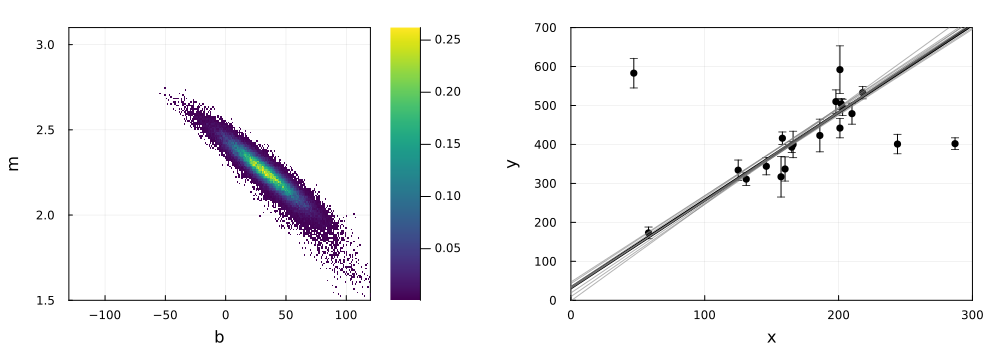

In [1]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

df = CSV.read("table1.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.X)
y = Array(df.Y)
σx = Array(df.sigmaX)
σy = Array(df.sigmaY)
rho_xy = Array(df.rhoXY)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
yerr = zeros(n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    yerr[i] = σy[i]
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit

"""The objective function"""
function objective(pars,X,Y,yerr)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*yerr[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/yerr[i]^2)+Pb/sqrt(2*pi*(Vb+yerr[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+yerr[i]^2))) for i in 1:length(X))#+pars[4]
end

#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,X,Y,yerr)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,yerr)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("bestm = ",bestm," bestb = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,yerr=yerr,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


### Exercise 7

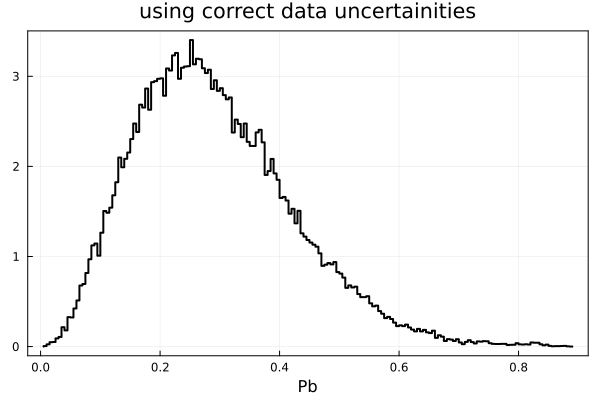

In [2]:

# Plot with marginalization over m, b, Vb, Yb for parameter Pb
histPb = stephist(accepted_Pb, nbins=200,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities",framestyle=:box)

Acceptance ratio was = 0.46185238095238096

Best-fit, overall!
[58.97016225733785, 1.971733786822836, 0.5957743932178943, 468.7191964776479, 8.777862541452246] 0.5967799412203774 0.605102032904006
Best-fit, marginalized
54.0 1.96
56.0 1.98
58.0 2.0
bestm = 1.98 bestb = 56.0


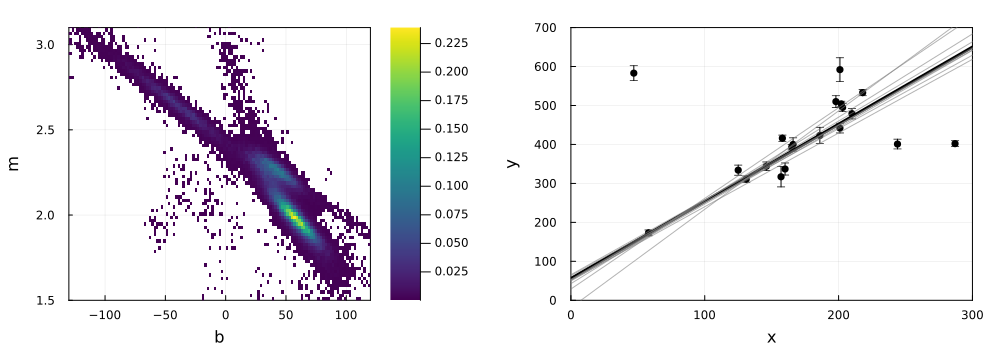

In [3]:

using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

df = CSV.read("table1.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.X)
y = Array(df.Y)
σx = Array(df.sigmaX)
σy = Array(df.sigmaY)
rho_xy = Array(df.rhoXY)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
yerr = zeros(n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = (σy[i]^2)/4
    yerr[i] = (σy[i])/2
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit

"""The objective function"""
function objective(pars,X,Y,yerr)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*yerr[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/yerr[i]^2)+Pb/sqrt(2*pi*(Vb+yerr[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+yerr[i]^2))) for i in 1:length(X))#+pars[4]
end

#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,X,Y,yerr)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,yerr)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)
#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("bestm = ",bestm," bestb = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,yerr=yerr,mc=:black)
#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


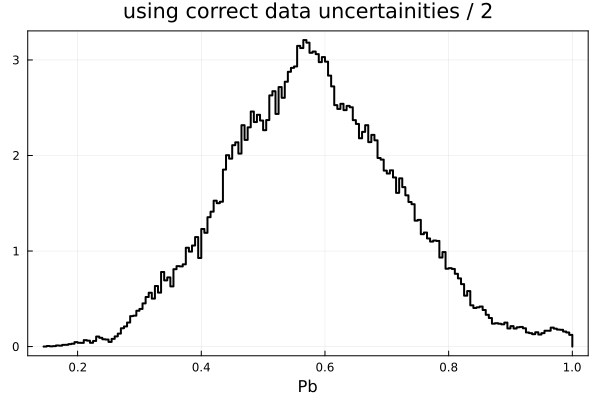

In [17]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb using data uncertaintities / 2
histPb = stephist(accepted_Pb, nbins=bins,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities / 2",framestyle=:box)
     

### Exercise 8

In [4]:
using Pandas, CSV, DataFrames, Plots, Statistics, LinearAlgebra

function least_square_fit(df)
    x = Array(df.X)
    y = Array(df.Y)
    σx = Array(df.sigmaX)
    σy = Array(df.sigmaY)
    rho_xy = Array(df.rhoXY)
    n = length(x)
    
    # Define Matrix
    X = zeros(n)
    Y = zeros(n) # defining a vector of n rows
    A = ones(n,2) # defining matrix of n rows and 2 columns
    C = zeros(n,n) # defining matrix of n rows and n columns
    yerr = zeros(n)
    for i in 1:n
        Y[i] = y[i]
        X[i] = x[i]
        A[i,2] = X[i]
        C[i,i] = σy[i]^2
        yerr[i] = σy[i]
    end    
    # least square fit    
    bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    S = inv(transpose(A)*inv(C)*A)    
    m = bestfit[2] # slope
    b = bestfit[1] # intercept
    SE_m = sqrt(inv(A' * inv(C) * A)[2, 2]) # Standard Error of Slope
    SE_b = sqrt(inv(A' * inv(C) * A)[1, 1]) # Standard error of intercept
    return m, SE_m, b, SE_b
end

df = read_csv("data.csv")

M = 20000
N = length(df.x)

## bootstrap estimate of uncertainty

m_orginal = least_square_fit(df)[1]

m_values = []

for i in 1:M
    replaced_sample = Pandas.sample(df, N, replace=true)
    m_current = least_square_fit(replaced_sample)[1]
    push!(m_values, m_current)
end

sigma_m_bootstrap = sum((m_values.-m_orginal).^2) / (M)
println("Original slope uncertainty: ", least_square_fit(df)[2])
println("Estimated uncertainty of slope by Bootstrap: ", sigma_m_bootstrap)

# jackknife estimate of uncertainty
m_values = []

for i in 1:N
    sample_without_ith_row = Pandas.sample(df, N, replace=true, ignore_index=i)
    m_current = least_square_fit(sample_without_ith_row)[1]
    push!(m_values, m_current)
end

sigma_m_jackknife = (N - 1) * sum((m_values.- m_orginal).^2) / N
println("Estimated uncertainty of slope by Jackknife: ", sigma_m_jackknife)


ERROR: LoadError: PyCall not properly installed. Please run Pkg.build("PyCall")
Stacktrace:
  [1] error(s::String)
    @ Base .\error.jl:33
  [2] top-level scope
    @ C:\Users\Tanmay Singh\.julia\packages\PyCall\9Nvls\src\startup.jl:44
  [3] include(mod::Module, _path::String)
    @ Base .\Base.jl:418
  [4] include(x::String)
    @ PyCall C:\Users\Tanmay Singh\.julia\packages\PyCall\9Nvls\src\PyCall.jl:1
  [5] top-level scope
    @ C:\Users\Tanmay Singh\.julia\packages\PyCall\9Nvls\src\PyCall.jl:38
  [6] include
    @ .\Base.jl:418 [inlined]
  [7] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::String)
    @ Base .\loading.jl:1318
  [8] top-level scope
    @ none:1
  [9] eval
    @ .\boot.jl:373 [inlined]
 [10] eval(x::Expr)
    @ Base.MainInclude .\client.jl:453
 [11] top-level scope
    @ none:1
in expression starting at C:\Users\Ta

ErrorException: Failed to precompile Pandas [eadc2687-ae89-51f9-a5d9-86b5a6373a9c] to C:\Users\Tanmay Singh\.julia\compiled\v1.7\Pandas\jl_984D.tmp.

### Best fitting using MCMC : Metropolis Hastings

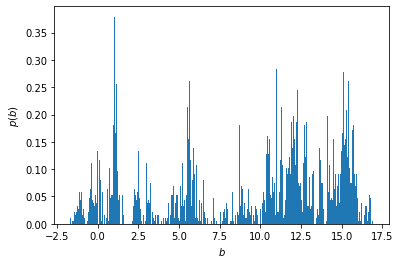

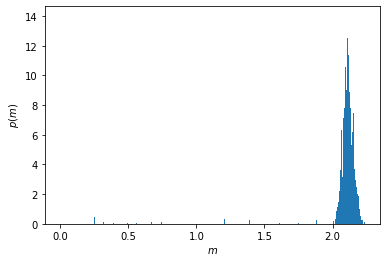

In [15]:
def metropolis_hastings_mcmc(x, y, sigma, b0, m0, Pb = 0.0, Yb = 0.0, Vb = 0.0, N = 10000, step_size = 0.1):
  b = [b0]
  m = [m0]
  for i in range(N):
    b_new = b[-1] + np.random.normal(0, step_size)
    m_new = m[-1] + np.random.normal(0, step_size)
    log_r = log_likelihood(x, y, sigma, b_new, m_new, Pb, Yb, Vb) - log_likelihood(x, y, sigma, b[-1], m[-1], Pb, Yb, Vb)
    if np.log(np.random.uniform()) < log_r:
      b.append(b_new)
      m.append(m_new)
    else:
      b.append(b[-1])
      m.append(m[-1])
  return b, m

b, m = metropolis_hastings_mcmc(X, Y, sigma_Y, 0, 0, N = 10000, step_size = 0.1)



plt.hist(b, bins = 1000, density = True);
plt.xlabel("$b$"); plt.ylabel("$p(b)$");
plt.show()

plt.hist(m, bins = 1000, density = True);
plt.xlabel("$m$"); plt.ylabel("$p(m)$");
plt.show()

  